### Dataset Story

Survived: Yolcunun hayatta kalma durumu (0: Hayatta kalmadı, 1: Hayatta kaldı).

Pclass: Yolcu sınıfı (1, 2, veya 3).

Sex: Yolcunun cinsiyeti (male veya female).

Age: Yolcunun yaşı.

SibSp: Yolcunun gemide bulunan eşi/kardeşi sayısı.

Parch: Yolcunun gemide bulunan ebeveyn/çocuk sayısı.

Fare: Bilet ücreti.

Embarked: Yolcunun gemiye hangi limandan bindiği (C: Cherbourg, Q: Queenstown, S: Southampton).





Makine öğrenimi uygulamalarında genellikle "Survived" sütunu tahmin edilmeye çalışılan hedef değişken olur. Diğer sütunlar ise modelin eğitilmesinde kullanılan özelliklerdir.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('tested.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


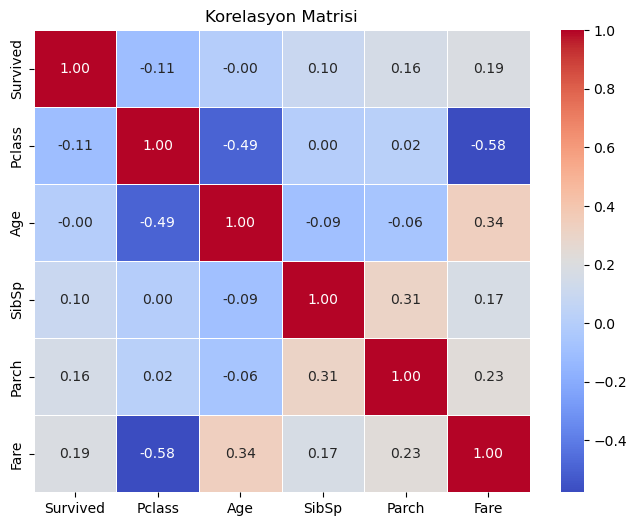

In [5]:
df = pd.read_csv('tested.csv')

selected_columns = ['Survived','Pclass','Age','SibSp','Parch','Fare']
selected_data = df[selected_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelasyon Matrisi')
plt.show()

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler

X = df[['Survived','Pclass','SibSp','Parch']]

# StandardScaler'ı oluştur ve veriyi normalize et
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

df_normalized = pd.DataFrame(X_normalized, columns=['Survived','Pclass','SibSp','Parch'])

print("Original Data:")
print(X.head())

print("\nNormalized Data:")
print(df_normalized.head())


Original Data:
   Survived  Pclass  SibSp  Parch
0         0       3      0      0
1         1       3      1      0
2         0       2      0      0
3         0       3      0      0
4         1       3      1      1

Normalized Data:
   Survived    Pclass     SibSp     Parch
0 -0.755929  0.873482 -0.499470 -0.400248
1  1.322876  0.873482  0.616992 -0.400248
2 -0.755929 -0.315819 -0.499470 -0.400248
3 -0.755929  0.873482 -0.499470 -0.400248
4  1.322876  0.873482  0.616992  0.619896


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Hedef değişkeni seç
y = df['Survived']

# Normalleştirilmiş veriyi ve hedef değişkeni ayır
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# KNeighborsClassifier'ı oluştur ve eğit
k_neighbors_classifier = KNeighborsClassifier(n_neighbors=4)
k_neighbors_classifier.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = k_neighbors_classifier.predict(X_test)

# Modelin performansını değerlendir
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9880952380952381
